In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from scipy.optimize import curve_fit

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data = 'covid19.csv'
urllib.request.urlretrieve(url, covid_data)

('covid19.csv', <http.client.HTTPMessage at 0x7f6ad1acd0b8>)

In [3]:
data = pd.read_csv(covid_data)

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648


In [5]:
data = data.rename(columns={'Province/State': 'province', 'Country/Region': 'country', 'Lat': 'latitude', 'Long': 'longitude'})

In [6]:
all_countries = data['country']

In [7]:
countries = pd.unique(all_countries)

In [8]:
US_row = data['country'].eq('US')

In [9]:
US_data = data[US_row].to_numpy()[0][4:-1]

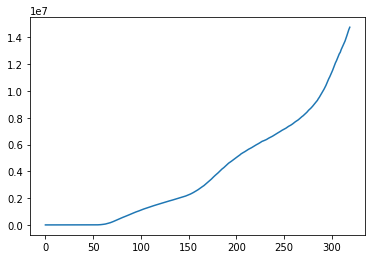

In [10]:
plt.plot(US_data)

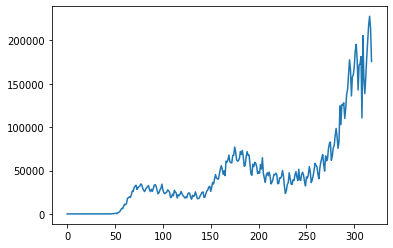

In [11]:
ediff = np.ediff1d(US_data)
plt.plot(ediff)

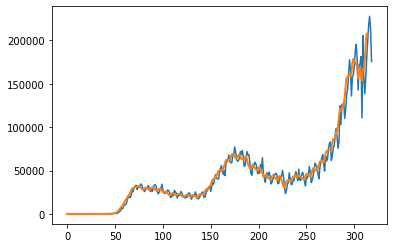

In [131]:
def run_mean(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
rmean = run_mean(ediff, 5)
plt.plot(ediff)
plt.plot(rmean, linewidth=2)

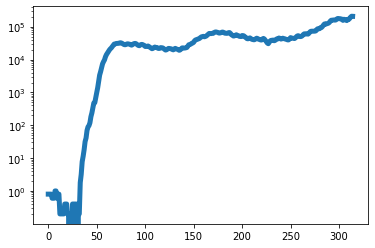

In [130]:
plt.plot(rmean, linewidth=5)
plt.yscale('log')

(38.0, 60.0)

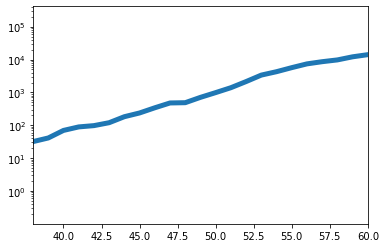

In [14]:
plt.plot(rmean, linewidth=5)
plt.yscale('log')
plt.xlim((38, 60))

In [124]:
exp_period = rmean[38:60].astype(np.float32)
init_vals = [0.5, 0.5]
y = exp_period
x = np.arange(38, 60, dtype=np.float32)
def model(t, a, b):
    return a*np.exp(b*t)
best_vals, covar = curve_fit(model, x, y, p0=init_vals)

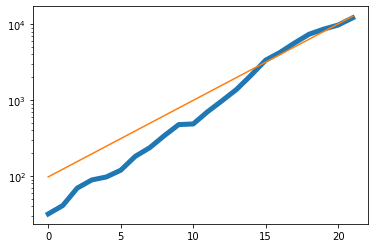

In [125]:
plt.plot(exp_period, linewidth=5)
plt.plot([a for a in model(x, *best_vals)])
plt.yscale('log')

In [145]:
import numpy as np
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = mpl_toolkits.basemap.Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()


AttributeError: module 'mpl_toolkits' has no attribute 'basemap'